In [1]:
from hiresprojection.guide import GuiderImageProjection
from hiresprojection.fit_utils import get_ellipse_params
import glob
import astropy.units as u
import numpy as np
from astropy.io import fits
from astropy.coordinates import SkyCoord
import spiceypy as spice
import matplotlib.pyplot as plt
import tqdm

In [2]:
projector = GuiderImageProjection('../data/2022Aug15/HIRES/GUIDE/hiresslit_135521.fits')

a floating-point value was expected. [astropy.wcs.wcs]


In [3]:
contour = projector.detect_limb(gamma=0.05, threshold=0.4)

3 (1055, 2)


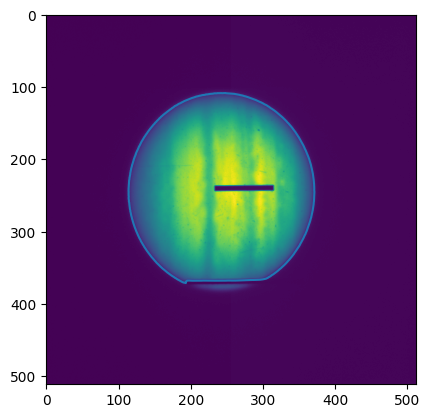

In [4]:
plt.imshow(projector.data)
plt.plot(*contour.T)

In [5]:
wcs = projector.wcs
wcs_fit = get_ellipse_params(contour, projector.limbRADec, projector.subpt, wcs, projector.data.shape)

[-0.36115357] 0.02229018727855603


In [6]:
limbRADecSky = [SkyCoord(ra=radec[0] * u.radian, dec=radec[1] * u.radian, frame='fk5') for radec in projector.limbRADec]
# limbRADecscorr = [radec.directional_offset_by(ang, -sep) for radec in limbRADecSky]
limbpix = np.asarray([wcs_fit.world_to_pixel(radec) for radec in limbRADecSky])

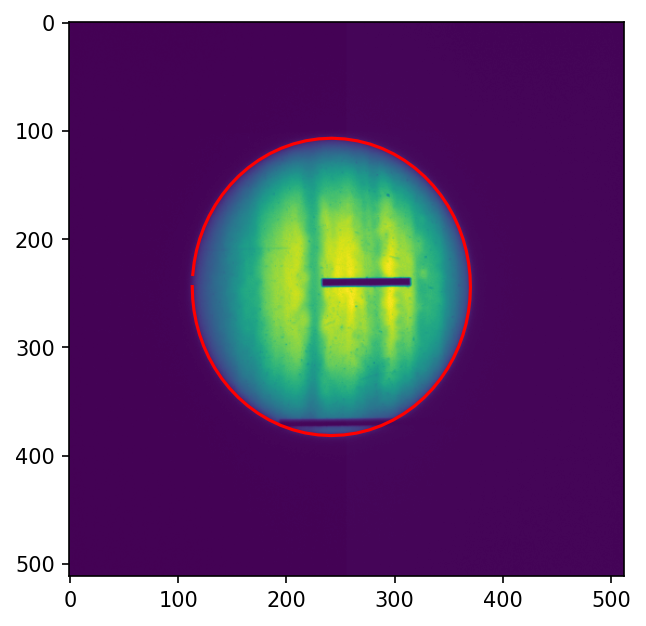

In [7]:
fig, ax = plt.subplots(1, 1, dpi=150)
ax.imshow(projector.data)
# ax.plot(*projector.wcs.wcs.crpix, 'rx')
# ax.plot(*projector.wcs.world_to_pixel(jupiter), 'ro')
# ax.plot(*wcs_fit.world_to_pixel(tel), 'rx')
ax.plot(limbpix[:, 0], limbpix[:, 1], 'r-')
plt.show()

In [8]:
projector.wcs = wcs_fit

In [9]:
projector.project_to_lonlat()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 262144/262144 [07:54<00:00, 551.93it/s]


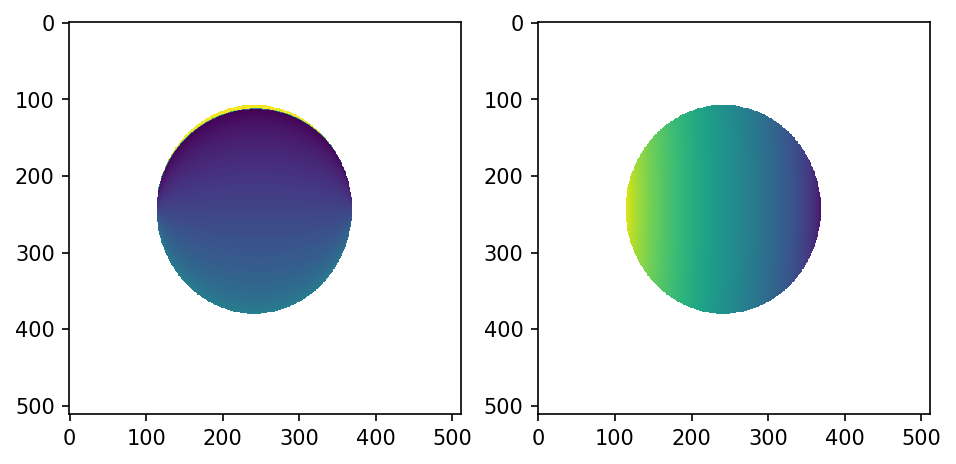

In [10]:
fig, axs = plt.subplots(1, 2, dpi=150)
axs[0].imshow(projector.lonlat[:, :, 0], vmin=0, vmax=360)
axs[1].imshow(projector.lonlat[:, :, 1], vmin=-90, vmax=90)

plt.tight_layout()
plt.show()

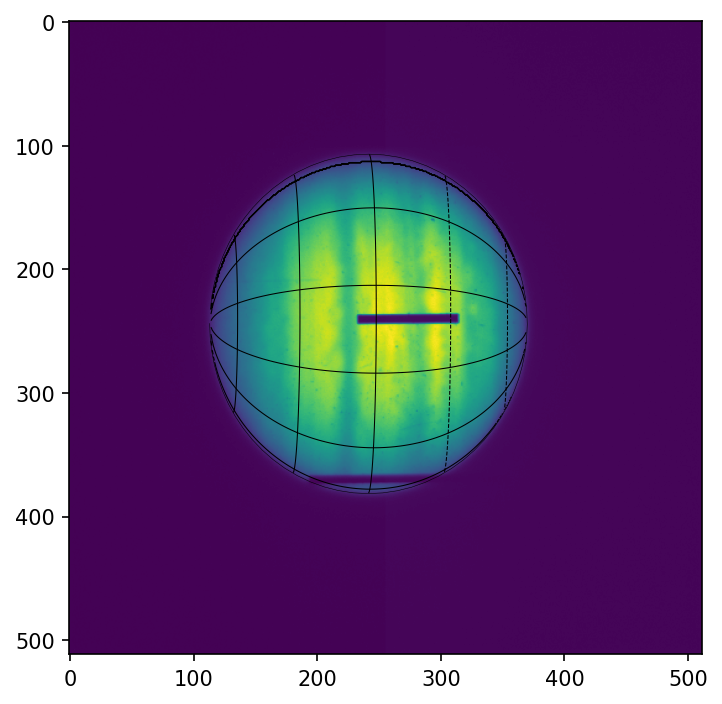

In [13]:
fig, ax = plt.subplots(1, 1, dpi=150)
ax.imshow(projector.data)
ax.plot(limbpix[:, 0], limbpix[:, 1], 'k-', linewidth=0.25)
ax.contour(projector.lonlat[:, :, 0], np.arange(-180, 180, 30), colors='k', linewidths=0.5)
ax.contour(projector.lonlat[:, :, 1], np.arange(-90, 90, 30), colors='k', linewidths=0.5)

plt.tight_layout()
plt.show()